# ASSOCIATION ANALYSIS WITH ECLAT

**File:** Eclat.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# INSTALL AND IMPORT LIBRARIES
The Python library `pyECLAT` contains the implementation of the Eclat algorithm, which can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [1]:
pip install pyECLAT

Note: you may need to restart the kernel to use updated packages.


If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [ ]:
# import sys
# !{sys.executable} -m pip install pyECLAT

Once `pyECLAT` is installed, then load the libraries below.

In [2]:
import pandas as pd              # For dataframes
import matplotlib.pyplot as plt  # For plotting data
from pyECLAT import ECLAT        # For Eclat algorithm

# LOAD AND PREPARE DATA
For this demonstration, we'll use the dataset `Groceries.csv`, which comes from the R package `arules` and is saved as a CSV file. The data is in transactional format (as opposed to tabular format), which means that each row is a list of items purchased together and that the items may be in different order. There are 32 columns in each row, each column either contains a purchased items or NaN.

## Import Data

- To read read the dataset from a local CSV file, run the following cell.

In [3]:
df = pd.read_csv('data/Groceries.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# APPLY ECLAT

Call `ECLAT()` on `transactions_df` to fit a model. For parameters, `ECLAT.fit()` can take the minimum support, minimum confidence, minimum lift, and minimum items in a transaction. Only the pairs of items that satisfy these criteria will be returned.

As a note, increasing the number for `max_combination` will dramatically increase the processing time. With a value of 2, processing takes a few seconds; with a value of 3, processing takes minutes.

In [4]:
eclat_instance = ECLAT(data=df, verbose=True)

_, supports = eclat_instance.fit(
    min_support=0.03,
    min_combination=2,
    max_combination=2,
    separator=' & ',
    verbose=True)

100%|██████████| 169/169 [00:00<00:00, 2770.49it/s]


Combination 2 by 2


946it [00:05, 186.40it/s]


In [5]:
supports

{'bottled water & whole milk': 0.03436705643111337,
 'whipped/sour cream & whole milk': 0.032231825114387394,
 'soda & whole milk': 0.040061006609049314,
 'soda & rolls/buns': 0.03833248601931876,
 'soda & other vegetables': 0.032740213523131674,
 'pip fruit & whole milk': 0.030096593797661414,
 'tropical fruit & whole milk': 0.04229791560752415,
 'tropical fruit & other vegetables': 0.035892221657346214,
 'sausage & rolls/buns': 0.030604982206405694,
 'yogurt & whole milk': 0.05602440264361973,
 'yogurt & rolls/buns': 0.03436705643111337,
 'yogurt & other vegetables': 0.04341637010676157,
 'whole milk & root vegetables': 0.048906964921199794,
 'whole milk & rolls/buns': 0.05663446873411286,
 'whole milk & other vegetables': 0.07483477376715811,
 'whole milk & pastry': 0.033248601931875954,
 'whole milk & citrus fruit': 0.030503304524656837,
 'root vegetables & other vegetables': 0.047381799694966954,
 'rolls/buns & other vegetables': 0.042602948652770714}

## Convert Rules to Readable Format

This code takes the rules above and formats them in a table format that is easier to read and modify.

In [6]:
rows = []

for rule, support in supports.items():
    from_, to = rule.split(' & ')
    rows.append({
        'From': from_,
        'To': to,
        'Support': support
    })
    
rules_df = pd.DataFrame(rows)

rules_df.head()

,From,To,Support
0,bottled water,whole milk,0.034367
1,whipped/sour cream,whole milk,0.032232
2,soda,whole milk,0.040061
3,soda,rolls/buns,0.038332
4,soda,other vegetables,0.032740


## List Rules with N's
The code below calls `plot()` on each row of the rules DataFrame to create a list of all the mined rules. First, we have to add two numeric columns corresponding to each item to `rules_df`.

In [7]:
# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20).sort_values(by='Support', ascending=False)

,From,To,Support,FromN,ToN
14,whole milk,other vegetables,0.074835,8,9
13,whole milk,rolls/buns,0.056634,8,4
9,yogurt,whole milk,0.056024,6,8
12,whole milk,root vegetables,0.048907,8,2
17,root vegetables,other vegetables,0.047382,2,9
11,yogurt,other vegetables,0.043416,6,9
18,rolls/buns,other vegetables,0.042603,4,9
6,tropical fruit,whole milk,0.042298,11,8
2,soda,whole milk,0.040061,10,8
3,soda,rolls/buns,0.038332,10,4


## Plot Rules
Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 100 (support*100). The width of each line is controlled by the confidence of each rule.

/tmp/ipykernel_42513/1938463802.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


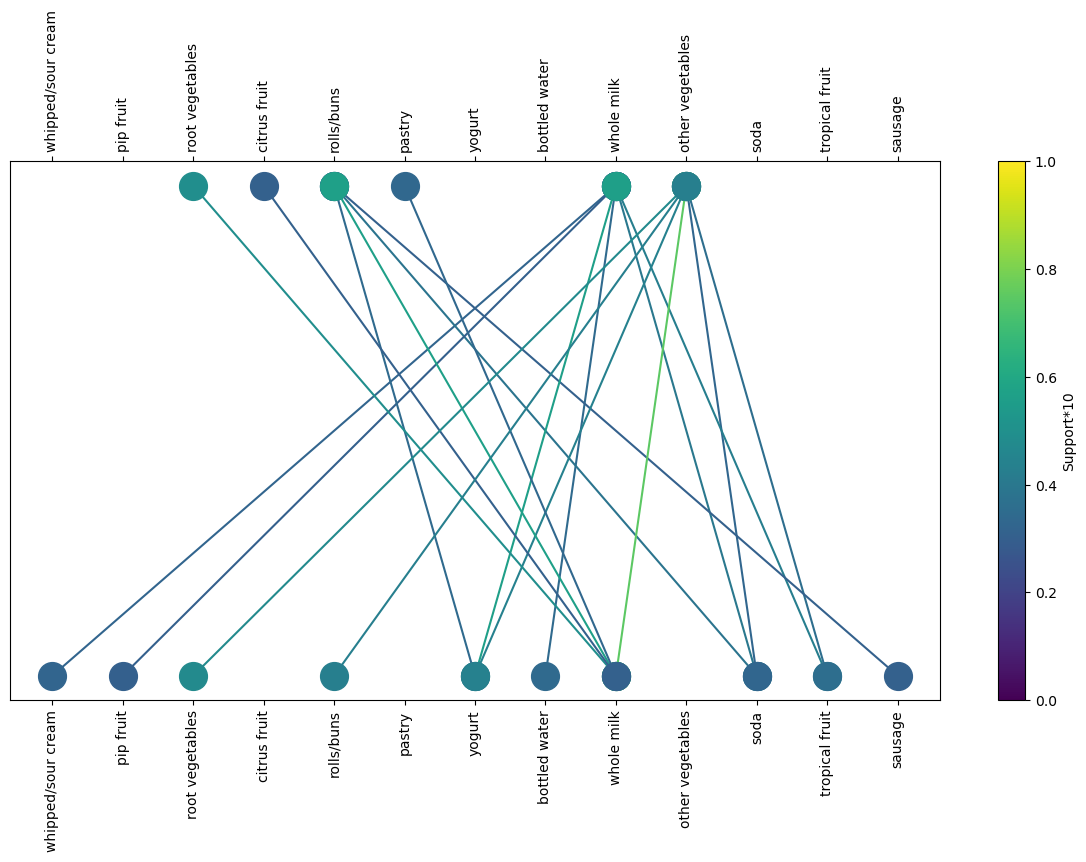

In [8]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20)

# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.